In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('homeprices.csv')

#### This is our dataset, with three features area, bedrooms and age
#### Our y labels is the price of the house, that we want to predict

In [3]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


#### At first we check for any null or duplicate values in our dataset

In [5]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

##### We have one missing value in bedrooms, to replace the missing values, lets check the distribution of bedrooms across the data

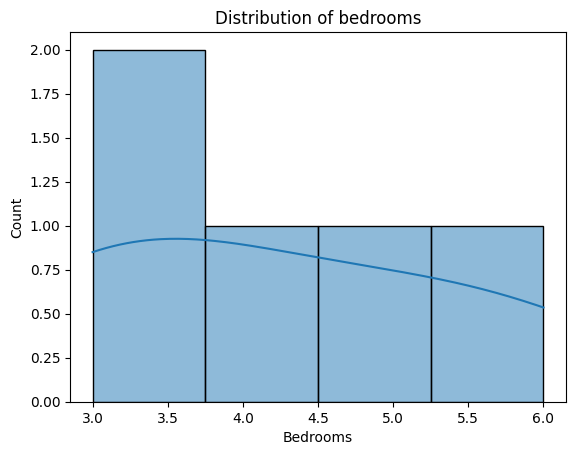

In [9]:
fig, ax = plt.subplots()
ax.set_title('Distribution of bedrooms')
sns.histplot(x = 'bedrooms', data = df, kde = True)
ax.set_xlabel('Bedrooms')
plt.show()

In [10]:
## Considering our small dataset, we see data is right skewed distributed. We can safely replace the missing value with median

In [11]:
median_of_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_of_bedrooms)

In [12]:
df.isna().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [13]:
print(f"The number of rows in the data : {df.shape[0]}")
print(f"The number of features in the data set : {df.shape[1]}")

The number of rows in the data : 6
The number of features in the data set : 4


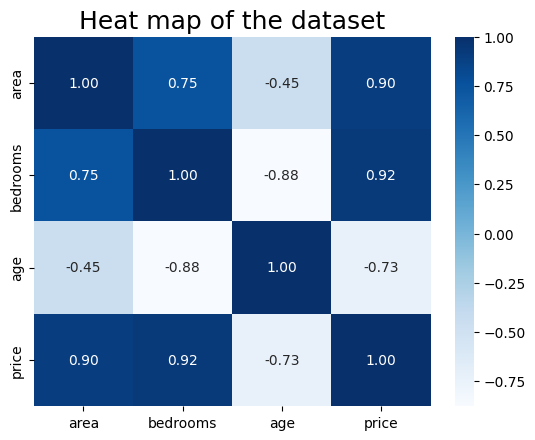

In [49]:
fig, ax = plt.subplots()
ax.set_title('Heat map of the dataset', fontsize = 18)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

In [50]:
## From the dataset , we see area and bedrooms are highly possitively correlated , whereas age is highly negatively correlated to price of the house

In [15]:
X = df.drop('price', axis = 'columns')
y = df['price']

#### Splitting our dataset into train and test data

In [14]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [27]:
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

array([[-1.3462912 , -0.39223227, -0.09865272],
       [ 1.2070197 ,  1.56892908, -0.96186407],
       [-0.88205286, -0.39223227,  0.27129499],
       [ 0.97490053,  0.58834841, -0.96186407],
       [ 0.04642383, -1.37281295,  1.75108586]])

In [28]:
X_test_scaled = sc.fit_transform(X_test)
X_test_scaled

array([[0., 0., 0.]])

### Modeling

In [29]:
from sklearn import linear_model

In [30]:
model = linear_model.LinearRegression()

### Fitting the model

In [54]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
model.intercept_

np.float64(668000.0)

In [56]:
model.coef_

array([58620.67786494, 40878.76700227, -9622.79674312])

In [57]:
y_pred = model.predict(X_test_scaled)

In [58]:
y_pred

array([668000.])

In [61]:
model.score(X_train_scaled, y_train)

0.9948251747249852

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [63]:
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE : 118000.0


In [64]:
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MAE : 118000.0
